# Classe

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class NetworkData():
    
    def __init__(self, path, other=False):
        
        self.path  = path
        self.time  = 15.0
        self.other = other
        
        with open(path) as f:
            self.lines = f.readlines()

        self.f_bus = 4

        for idx, line in enumerate(self.lines):

            if 'END OF BUS DATA'  in line: self.l_bus  = idx - 1

            if 'BEGIN LOAD DATA'  in line: self.f_load = idx + 2
            if 'END OF LOAD DATA' in line: self.l_load = idx - 1

            if 'BEGIN GENERATOR DATA'  in line: self.f_gen = idx + 2
            if 'END OF GENERATOR DATA' in line: self.l_gen = idx - 1

        self.getBusDataFrame()
        self.getLoadDataFrame()
        self.getGenDataFrame()
        
        

    ### ==========================================================================================================================
    '''
    Function to create a Pandas DataFrame for BUS data    
    '''
    ### ==========================================================================================================================

    def getBusDataFrame(self):

        columns = ['BUS_ID', 'BUS_NAME', 'VBASEKV', 'TP', 'S', 'GSHT_MW', 'BSHMVAR', 'ARE', 'ZON',
                  'MODV_PU', 'ANGV_DEG', 'VMXN_PU', 'VMNN_PU', 'VMXE_PU', 'VMNE_PU', 'OWN', 'SUB', 'ARG']
        
        if self.other:
            columns = ['BUS_ID', 'BUS_NAME', 'VBASEKV', 'TP', 'S', 'GSHT_MW', 'BSHMVAR', 'ARE', 'ZON',
                       'MODV_PU', 'ANGV_DEG', 'VMXN_PU', 'VMNN_PU', 'OWN', 'SUB']
        
        
        data    = []

        for i in range(self.f_bus, self.l_bus + 1):
            bus_info = self.lines[i].strip().replace('/', ' ').replace('\'', ' ').replace(',', ' ').split()
            data.append(bus_info)

        self.DF_bus = pd.DataFrame(data, columns=columns)

        type_dict = {'BUS_ID'   : 'int32',
                     # 'BUS_NAME' :,
                     'VBASEKV'  : 'float64',
                     'TP'       : 'int32',
                     'S'        : 'int32',
                     'GSHT_MW'  : 'float64',
                     'BSHMVAR'  : 'float64',
                     'ARE'      : 'int32',
                     'ZON'      : 'int32',
                     'MODV_PU'  : 'float64',
                     'ANGV_DEG' : 'float64',
                     'VMXN_PU'  : 'float64',
                     'VMNN_PU'  : 'float64',
                     'VMXE_PU'  : 'float64',
                     'VMNE_PU'  : 'float64',
                     'OWN'      : 'int32',
                     'SUB'      : 'int32',
                     'ARG'      : 'int32'}
        
        if self.other:
            type_dict = {'BUS_ID'   : 'int32',
                         # 'BUS_NAME' :,
                         'VBASEKV'  : 'float64',
                         'TP'       : 'int32',
                         'S'        : 'int32',
                         'GSHT_MW'  : 'float64',
                         'BSHMVAR'  : 'float64',
                         'ARE'      : 'int32',
                         'ZON'      : 'int32',
                         'MODV_PU'  : 'float64',
                         'ANGV_DEG' : 'float64',
                         'VMXN_PU'  : 'float64',
                         'VMNN_PU'  : 'float64',
                         'OWN'      : 'int32',
                         'SUB'      : 'int32'}

        self.DF_bus = self.DF_bus.astype(type_dict)

        
    ### ==========================================================================================================================
    '''
    Function to create a Pandas DataFrame for LOAD data    
    '''
    ### ==========================================================================================================================

    def getLoadDataFrame(self):

        columns = ['BUS_ID' ,'ID', 'ST', 'PL_MW', 'QL_MVAR', 'IPL_MW', 'IQL_MVAR', 'ZPL_MW', 'ZQL_MVAR', 'OWN', 'R0', 'X0', 'Name']
        
        if self.other:
            columns = ['BUS_ID' ,'ID', 'ST', 'descobrir-A', 'descobrir-B', 'PL_MW', 'QL_MVAR', 'IPL_MW', 'IQL_MVAR', 'ZPL_MW', 'ZQL_MVAR', 'OWN']
        
        data    = []

        for i in range(self.f_load, self.l_load + 1):
            load_info = self.lines[i].strip().replace('/', ' ').replace('\'', ' ').replace(',', ' ').split()
            data.append(load_info)

        self.DF_load = pd.DataFrame(data, columns=columns)
        # print(data[0])

        type_dict = {'BUS_ID'   : 'int32',
                     # 'ID'       :, 
                     'ST'       : 'int32', 
                     'PL_MW'    : 'float64', 
                     'QL_MVAR'  : 'float64', 
                     'IPL_MW'   : 'float64', 
                     'IQL_MVAR' : 'float64', 
                     'ZPL_MW'   : 'float64', 
                     'ZQL_MVAR' : 'float64', 
                     'OWN'      : 'int32', 
                     'R0'       : 'float64', 
                     'X0'       : 'float64', 
                     # 'Name'     :
                     }
        
        if self.other:
            type_dict = {'BUS_ID'   : 'int32',
                         # 'ID'       :, 
                         'ST'       : 'int32', 
                         'PL_MW'    : 'float64', 
                         'QL_MVAR'  : 'float64', 
                         'IPL_MW'   : 'float64', 
                         'IQL_MVAR' : 'float64', 
                         'ZPL_MW'   : 'float64', 
                         'ZQL_MVAR' : 'float64', 
                         'OWN'      : 'int32'}


        self.DF_load = self.DF_load.astype(type_dict)

    ### ==========================================================================================================================
    '''
    Function to create a Pandas DataFrame for GENERATION data    
    '''
    ### ==========================================================================================================================

    def getGenDataFrame(self):

        columns = ['BUS_ID', 'ID', 'PG_MW', 'QG_MVAR', 'QMX_MVAR', 'QMN_MVAR', 'VSPECPU', 'BCO_ID',
                   'BASE_MVA', 'RTRF_PU', 'XTRF_PU', 'TAP_PU', 'ST', 'FP%', 'PMAX_MW', 'PMIN_MW',
                   'GRP', 'BLOCKED', 'OWNER', 'CONECTION', 'R1', 'X1', 'R2', 'X2', 'R0', 'X0', 'RGRD',
                   'XGRD', 'XQ', 'SF', 'MAXANG', 'TYPE', 'NAME', 'NMAX', 'NON']
        
        if self.other:
            columns = ['BUS_ID', 'ID', 'PG_MW', 'QG_MVAR', 'QMX_MVAR', 'QMN_MVAR', 'VSPECPU', 'BCO_ID',
                       'BASE_MVA', 'RTRF_PU', 'XTRF_PU', 'TAP_PU', 'ST', 'FP%', 'PMAX_MW', 'PMIN_MW',
                       'GRP', 'BLOCKED']
        
        data    = []

        for i in range(self.f_gen, self.l_gen + 1):
            gen_info = self.lines[i].strip().replace('/', ' ').replace('\'', ' ').replace(',', ' ').split()
            data.append(gen_info)

        self.DF_gen = pd.DataFrame(data, columns=columns)
        # print(data[0])

        type_dict = {'BUS_ID'    : 'int32',
                     # 'ID'        :, 
                     'PG_MW'     : 'float64', 
                     'QG_MVAR'   : 'float64', 
                     'QMX_MVAR'  : 'float64', 
                     'QMN_MVAR'  : 'float64', 
                     'VSPECPU'   : 'float64', 
                     'BCO_ID'    : 'int32',
                     'BASE_MVA'  : 'float64', 
                     'RTRF_PU'   : 'float64', 
                     'XTRF_PU'   : 'float64', 
                     'TAP_PU'    : 'float64', 
                     'ST'        : 'int32', 
                     'FP%'       : 'float64', 
                     'PMAX_MW'   : 'float64', 
                     'PMIN_MW'   : 'float64',
                     'GRP'       : 'int32', 
                     'BLOCKED'   : 'int32', 
                     'OWNER'     : 'int32', 
                     'CONECTION' : 'int32', 
                     'R1'        : 'float64', 
                     'X1'        : 'float64', 
                     'R2'        : 'float64', 
                     'X2'        : 'float64', 
                     'R0'        : 'float64', 
                     'X0'        : 'float64', 
                     'RGRD'      : 'float64',
                     'XGRD'      : 'float64', 
                     'XQ'        : 'float64', 
                     'SF'        : 'float64', 
                     'MAXANG'    : 'float64', 
                     'TYPE'      : 'int32', 
                     # 'NAME'      :, 
                     'NMAX'      : 'int32', 
                     'NON'       : 'int32'
                     }
        
        if self.other:
            type_dict = {'BUS_ID'    : 'int32',
                         # 'ID'        :, 
                         'PG_MW'     : 'float64', 
                         'QG_MVAR'   : 'float64', 
                         'QMX_MVAR'  : 'float64', 
                         'QMN_MVAR'  : 'float64', 
                         'VSPECPU'   : 'float64', 
                         'BCO_ID'    : 'int32',
                         'BASE_MVA'  : 'float64', 
                         'RTRF_PU'   : 'float64', 
                         'XTRF_PU'   : 'float64', 
                         'TAP_PU'    : 'float64', 
                         'ST'        : 'int32', 
                         'FP%'       : 'float64', 
                         'PMAX_MW'   : 'float64', 
                         'PMIN_MW'   : 'float64',
                         'GRP'       : 'int32', 
                         'BLOCKED'   : 'int32'}

        self.DF_gen = self.DF_gen.astype(type_dict)

        self.DF_gen['PMAX_MW'] = self.DF_gen['PG_MW']*1.25

    def networkInfo(self, show=False):

        self.total_PL_MW   = self.DF_load['PL_MW'].sum()   
        self.total_QL_MVAR = self.DF_load['QL_MVAR'].sum() 
        # print(self.total_PL_MW, self.total_QL_MVAR)

        self.total_PG_MW   = self.DF_gen['PG_MW'].sum()    
        self.total_QG_MVAR = self.DF_gen['QG_MVAR'].sum() 
        # print(self.total_PG_MW, self.total_QG_MVAR)

        self.total_PMAX_MW = self.DF_gen['PMAX_MW'].sum()  
        self.total_PMIN_MW = self.DF_gen['PMIN_MW'].sum()
        # print(self.total_PMAX_MW, self.total_PMIN_MW)

        self.reserva_total   = self.total_PMAX_MW - self.total_PG_MW
        self.reserva_per_gen = self.DF_gen['PMAX_MW'] - self.DF_gen['PG_MW']

        self.total_PG_RENEW = self.DF_gen[self.DF_gen['TYPE'] == 4]['PG_MW'].sum() 
        self.total_PG_SYNC  = self.DF_gen[(self.DF_gen['BLOCKED'] == 0)]['PG_MW'].sum() 
        # print(self.total_PG_RENEW, self.total_PG_SYNC)

        self.total_PMAX_MW_unblock  = self.DF_gen[self.DF_gen['BLOCKED'] == 0]['PMAX_MW'].sum() 
        self.total_PMAX_MW_block    = self.DF_gen[self.DF_gen['BLOCKED'] == 1]['PMAX_MW'].sum() 

        self.total_PG_MW_unblock    = self.DF_gen[self.DF_gen['BLOCKED'] == 0]['PG_MW'].sum() 
        self.total_PG_MW_block      = self.DF_gen[self.DF_gen['BLOCKED'] == 1]['PG_MW'].sum() 
        
        self.total_headroom_unblock = self.total_PMAX_MW_unblock - self.total_PG_MW_unblock
        
        
        self.total_headroom        = self.total_PMAX_MW - self.total_PG_MW
        # print('UNBLOCKED:', self.total_PMAX_MW_unblock)
        
        self.penetration = self.total_PG_RENEW / self.total_PG_MW
        
        if show:
            
            print(' ====================== Network Info ====================== ')
            print(' ======================== GENERATOR ======================= \n')
            print(f' Total Active Power:   {self.total_PG_MW:.4f} MW')
            print(f' Total Reactive Power: {self.total_QG_MVAR:10.4f} MVar\n')
            
            print(f' Total Max Active Power: {self.total_PMAX_MW:.4f} MW')
            print(f' Total Min Active Power: {self.total_PMIN_MW:10.4f} MW\n')
            
            print(f' Total Renew Active Power: {self.total_PG_RENEW:10.4f} MW')
            print(f' Total Sync Active Power:  {self.total_PG_SYNC:.4f} MW\n')
            
            print(f' Total Headroom:             {self.total_headroom:10.4f} MW')
            print(f' Total Max Unblocked Power:  {self.total_PMAX_MW_unblock:.4f} MW')
            print(f' Total Head Unblocked Power: {self.total_headroom_unblock:10.4f} MW\n')
            
            print(f' Renewable Penetration: {self.penetration*100:.4f} %\n')

            print(f' Total Max Unblocked Power:  {self.total_PMAX_MW_unblock:.4f} MW')
            print(f' Total Max Blocked Power:    {self.total_PMAX_MW_block:10.4f} MW\n')

            print(f' Total Unblocked Power:  {self.total_PG_MW_unblock:10.4f} MW')
            print(f' Total Blocked Power:    {self.total_PG_MW_block:10.4f} MW')
            
            print(' ========================== LOAD ========================== \n')
            print(f' Total Active Power:   {self.total_PL_MW:10.4f} MW')
            print(f' Total Reactive Power: {self.total_QL_MVAR:10.4f} MVar\n\n')

    def changeLoad(self, param, multi, spec=None, arre=2, keepFP=False):
        
        
        ite = spec if spec else [i for i in range(len(self.DF_load))]
        
        if keepFP:
            for i in ite:      
                
                kw, kvar = self.DF_load['PL_MW'].values[i], self.DF_load['QL_MVAR'].values[i]
                FP       = np.cos(np.arctan(kvar/kw))
                
                kw_new   = kw*multi
                kvar_new = np.tan(np.arccos(FP))*kw_new
                
                self.DF_load.loc[i, 'PL_MW']   = kw_new
                self.DF_load.loc[i, 'QL_MVAR'] = kvar_new
                
                
                
#                 MW, MVAR = float(self.DF_load['PL_MW'][i]), float(self.DF_load['QL_MVAR'][i])                    
#                 FP       = MW / np.sqrt(MW**2 + MVAR**2)
                    
#                 new_MW   = MW*multi
#                 new_MVAR = np.sqrt((new_MW/FP)**2 - new_MW**2)
                    
#                 self.DF_load['PL_MW'][i]   = round(new_MW,   arre) 
#                 self.DF_load['QL_MVAR'][i] = round(new_MVAR, arre)                  

        else:      
            for i in ite:
                self.DF_load[param][i] = round(float(self.DF_load.iloc[i][param])*multi, arre)    
                
        self.cargaTotal = 0
        for i in self.DF_load['PL_MW'].values:
            self.cargaTotal += float(i)
            
    def changeGenType(self, gen_index, new_type):
        self.DF_gen.loc[gen_index, 'TYPE'] = new_type

    def blockGen(self, value, swing=None):
        self.networkInfo()

        threshold = self.total_PL_MW * value

        sort = self.DF_gen.sort_values(by=["PMAX_MW"], ascending=False)
        sort = sort[sort['TYPE'] != 4]
        
        if swing:
            sort = sort[sort['BUS_ID'] != swing]

        removed_gen, generators = 0, []

        for gen in sort['BUS_ID'].values:

            current_gen = self.DF_gen[self.DF_gen['BUS_ID'] == gen]['PMAX_MW'].values[0]

            # print(f'{gen:2d} : {current_gen}')

            teste = self.total_PMAX_MW - removed_gen - current_gen

            if teste >= threshold:
                removed_gen += current_gen
                generators.append(gen)

            else:
                break

        generators_idx = np.asarray(generators) - 1

        # print(threshold, generators, generators_idx)

        self.DF_gen.loc[generators_idx, 'BLOCKED'] = 1 

        self.networkInfo()

        # print(sort['BUS_ID'].values)

    def save(self, save_path):
        
        # GEN
        
        for idx, i in enumerate(range(self.f_gen, self.l_gen+1)):
            
            new_line = ''
            for j in range(len(self.DF_gen.iloc[idx])):
                if j != len(self.DF_gen.iloc[idx])-1:
                    
                    if len(str(self.DF_gen.iloc[idx, j])) < 5:
                        new_line += f'{str(self.DF_gen.iloc[idx, j]): >6}' + ','
                    elif len(str(self.DF_gen.iloc[idx, j])) >= 5 and len(str(self.DF_gen.iloc[idx, j])) < 10:
                        new_line += f'{str(self.DF_gen.iloc[idx, j]): >11}' + ','
                    else:
                        new_line += f'{str(self.DF_gen.iloc[idx, j]): >14}' + ','
                    
                    
                    
                    #new_line += str(self.DF_gen.iloc[idx, j]) + ','
                else:
                    new_line += '  ' + str(self.DF_gen.iloc[idx, j]) + '/'
                
            self.lines[i] = new_line + ' \n'
            
        # LOAD
            
        for idx, i in enumerate(range(self.f_load, self.l_load+1)):
            
            new_line = ''
            for j in range(len(self.DF_load.iloc[idx])):
                if j != len(self.DF_load.iloc[idx])-1:
                    
                    if len(str(self.DF_load.iloc[idx, j])) < 5:
                        new_line += f'{str(self.DF_load.iloc[idx, j]): >6}' + ','
                    elif len(str(self.DF_load.iloc[idx, j])) >= 5 and len(str(self.DF_load.iloc[idx, j])) < 10:
                        new_line += f'{str(self.DF_load.iloc[idx, j]): >11}' + ','
                    else:
                        new_line += f'{str(self.DF_load.iloc[idx, j]): >14}' + ','
                    
                else:
                    new_line += '  ' + str(self.DF_load.iloc[idx, j]) + '/'
                
            self.lines[i] = new_line + ' \n'
            
        # SAVE
            
        with open(save_path, 'w') as f:
            for line in self.lines:
                f.write(line)

In [29]:
class DynamicData():
    
    def __init__(self, path, other=False):

        with open(path) as f:
            lines = f.readlines()

        lines = [line.strip().replace('/', '').replace('!', '') for line in lines]
        lines = [line for line in lines if line != '']
        lines = lines[1:-3]

        SM_index = [idx for idx, line in enumerate(lines) if 'SM' in line]
        SM_index.append(len(lines))

        grouped = [lines[SM_index[i]+1 : SM_index[i+1]] for i in range(len(SM_index)-1)]

        ident = [gen[1].split() for gen in grouped]
        gen   = [gen[3].split() for gen in grouped]
        avr   = self.excitation(grouped, 5, 'AVR')
        pss   = self.excitation(grouped, 7, 'PSS')
        gov   = self.excitation(grouped, 9, 'GOV')

        ident_col = ['Bus', 'ID', 'AVR', 'PSS', 'UEL', 'OEL', 'SCL', 'Gov', 'Ctrl', 'Rc(pu)', 'Xc(pu)', 'Tr(s)', 'Bus-Name', 'CtrBus-Name']
        gen_col   = ['Xd(pu)', 'Xld(pu)', 'Xlld(pu)', 'Xq(pu)', 'Xlq(pu)', 'Xllq(pu)', 'Ra(pu)', 'Base(MVA)', 'Xl(pu)', 'Xt(pu)', 'Tld(s)', 'Tlld(s)', 'Tlq(s)', 'H(MWMVA.s)', 'D(pupu)', 'Tllq(pu)', 'S1.0', 'S1.2', 'Cg']
        avr_col   = ['KP', 'KI', 'KD', 'TD', 'VRMAX', 'VRMIN', 'KA', 'TA', 'KE', 'TE', 'KF', 'TF', 'VEMIN', 'AEX', 'BEX', 'PIDMAX', 'PIDMIN', 'OELFLAG', 'UELFLAG']
        pss_col   = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'T1', 'T2', 'T3', 'T4', 'T5', 'K', 'Vmin', 'Vmax', 'Vcu', 'Vcl', 'Type']
        gov_col   = ['R', 'T1', 'PMAX', 'PMIN', 'T2', 'T3']

        self.ident_data = pd.DataFrame(data=ident, columns=ident_col)
        self.gen_data   = pd.DataFrame(data=gen, columns=gen_col)
        self.avr_data   = pd.DataFrame(data=avr, columns=avr_col)
        self.pss_data   = pd.DataFrame(data=pss, columns=pss_col)
        self.gov_data   = pd.DataFrame(data=gov, columns=gov_col)


    def excitation(self, grouped, idx, var):

        lista_excitation = []
        for gen in grouped:
            lista_excitation.append(gen[idx].split() if var in gen[1] else [np.nan for i in range(len(grouped[0][idx].split()))])

        return lista_excitation

    def aggregate(self, lista):

        line = ''
        for item in lista:
            line += str(item) + ' '

        return line

    def NaN_list(self, data):

      return data[data.isna().any(axis=1)].index

    def save(self, save_path):

      file = []
      file.append('VERSION 1\n')
      file.append('!\n')

      title_ident = '! '+ self.aggregate(self.ident_data)
      title_gen   = '! '+ self.aggregate(self.gen_data)
      title_avr   = '! '+ self.aggregate(self.avr_data)
      title_pss   = '! '+ self.aggregate(self.pss_data)
      title_gov   = '! '+ self.aggregate(self.gov_data)

      nan_avr = self.NaN_list(self.avr_data)
      nan_pss = self.NaN_list(self.pss_data)
      nan_gov = self.NaN_list(self.gov_data)

      for i in range(len(self.ident_data)):

          file.append(f'SM05 MD{i+1:06d}\n')

          file.append(title_ident + '\n')
          file.append(self.aggregate(list(self.ident_data.iloc[i, :].values)) + '/\n')

          file.append(title_gen + '\n')
          file.append(self.aggregate(list(self.gen_data.iloc[i, :].values)) + '/\n')

          if i not in nan_avr:
              file.append(title_avr + '\n')
              file.append(self.aggregate(list(self.avr_data.iloc[i, :].values)) + '/\n')

          if i not in nan_pss:
              file.append(title_pss + '\n')
              file.append(self.aggregate(list(self.pss_data.iloc[i, :].values)) + '/\n')

          if i not in nan_gov:
              file.append(title_gov + '\n')
              file.append(self.aggregate(list(self.gov_data.iloc[i, :].values)) + '/\n')

          file.append('!\n')

      for i in range(3):
          file.append('-999 /\n')

      with open(save_path, 'w') as f:
            for line in file:
                f.write(line)






In [30]:
DD = DynamicData(path='/content/bus68/bus68.dyn')

In [31]:
DD.gen_data['H(MWMVA.s)'] = pd.to_numeric(DD.gen_data['H(MWMVA.s)'])*2

In [32]:
DD.save(save_path='/content/bus68/bus68_1.dyn')

In [ ]:
class EventData():

    def __init__(self, time):

        self.events   = []
        self.names    = []
        self.n_events = 0
        self.time     = time

    def new_event(self, name, evento, info1, param1, time, info2=0, info3=0, param2=0, param3=0):

        self.names.append(name)
        self.events.append([f'{evento:3d}    {info1:4d} {info2:4} {info3:4}      {param1:7.3f}  {param2:7.3f}     {time:5.3f}  \"xxxxxxxxxx  \"  \"xxxxxxxxxx  \"  {param3:7.3f} /\n'])
        print(f'Event number {len(self.events)} created')



    def append(self, n_event, evento, info1,  param1, time, info2=0, info3=0, param2=0, param3=0):

        self.events[n_event-1].append(f'{evento:3d}    {info1:4d} {info2:4} {info3:4}      {param1:7.3f}  {param2:7.3f}     {time:5.3f}  \"xxxxxxxxxx  \"  \"xxxxxxxxxx  \"  {param3:7.3f} /\n')

    def save(self, save_path):

      file = [f'{self.time: 7.3f}/\n']

      for i in range(len(self.names)):

          file.append(f'{i+1:3d} \'{self.names[i]: <45}\' /\n')

          for evt in self.events[i]:
              file.append(evt)
              

          file.append(' -99/ \n')

      file.append(' -999/ \n')

      with open(save_path, 'w') as f:
            for line in file:
                f.write(line)

In [ ]:
class VariablesData():

    def __init__(self):

        self.vars  = []
        self.plots = []
        self.names = []

    def new_variable(self, var, tipo, barra1, eqp1=0, barra2=0, eqp2=0, multiplier=1):

        self.vars.append(f'{len(self.vars)+1:4} {tipo:4} \'{var:<10}\' {barra1:4} {eqp1:4} {barra2:4} {eqp2:4} {multiplier:8.5f} \'            \' \'            \' / \n')
        print(f'Variable number {len(self.vars)} added')

    def new_plot(self, name, variable_number):

        variable_number = variable_number if type(variable_number) == list else [variable_number]

        self.names.append(name)
        self.plots.append(variable_number)


    def append(self, name, variable_number):

        variable_number = variable_number if type(variable_number) == list else [variable_number]

        idx = self.names.index(name)
        for var in variable_number:
            self.plots[idx].append(var)

    def save(self, save_path):

      file = [f'          -1 \n']

      for var in self.vars: file.append(var)

      file.append(' -9 /\n')
      file.append('\'\' /\n')

      for idx in range(len(self.names)):

          file.append(f'\'{self.names[idx] : <30}\'     0.00000    0.00000    0    0 \'N\' / \n')

          for num in self.plots[idx]:
              file.append(f'        {num:3}  0 / \n')

      file.append(' -9 /\n')
      file.append(' -99 /\n')

      with open(save_path, 'w') as f:
            for line in file:
                f.write(line)

In [35]:
class WorkData():

    def __init__(self, save_path, path=None, lista=None):

        if path:

            files = os.listdir(path)
            with open(save_path, 'w') as f:
                for line in files:
                    f.write(line + '\n')
                    print(line)

        elif lista:

            with open(save_path, 'w') as f:
              for line in lista:
                  f.write(line + '\n')
                  print(line)

In [41]:
class PlotReader():
    
    def __init__(self, path, tipo="Organon"):
        
        self.path = path
        self.tipo = tipo
        
        if self.tipo == "Organon":
            self.rows = 5
            
        if self.tipo == "Anatem":
            self.rows = 6
            
        self.get_data()
        self.get_values()
        self.get_names()
        
        
    def get_data(self):
        
        with open(self.path) as f:
            self.lines = f.readlines()
            
        self.var_num = int(self.lines[0].strip())
        self.var_num = int(self.var_num)

        # print("Numero de variaveis: ", self.var_num)

        self.resto = self.var_num % self.rows
        # print("Variaveis na ultima: ", self.resto)

        if self.resto > 0:
            self.num_linhas = int(self.var_num / self.rows) + 1
        else:
            self.num_linhas = int(self.var_num / self.rows)

        # print("Numero de linhas:    ", self.num_linhas)

        self.doc_size = int((len(self.lines) - 1 - self.var_num)/self.num_linhas)
        # print("Tamanho do documento:", self.doc_size)

        self.variaveis = np.zeros((self.var_num, self.doc_size))
        # print("Matriz de variaveis: ", self.variaveis.shape)
        
    def get_values(self):
        
        linha = 1
        cont = 0
        for i in range(self.var_num + 1, len(self.lines)):

            temporaria = self.lines[i].split()

            for e in range(len(temporaria)):
                self.variaveis[e + ((linha - 1)*self.rows), cont] = float(temporaria[e])



            if linha == self.num_linhas:
                linha = 1
                cont += 1
            else:
                linha += 1
        
    def get_names(self):
        
        self.var_dic = {}

        for i in range(1, self.var_num + 1):    
            self.var_dic[self.lines[i].rstrip()] = self.variaveis[i-1]

        # print(self.var_dic.keys())

    def save(self, save_path):

        df = pd.DataFrame(self.var_dic)
        df.to_csv(save_path)

In [ ]:
class resample():
    
    def __init__(self, x, n_sample):
        
        self.x = x
        self.n_sample = n_sample
        
        if len(self.x) > self.n_sample:
            self.resample_type = "downsampling"
            self.downsampling()
            
        if len(self.x) < self.n_sample:
            self.resample_type = "upsampling"
            self.upsampling()
            
        if len(self.x) == self.n_sample:
            self.resample_type = "nothing"
            self.nothing()
            
    def downsampling(self):
        
        self.freq = len(self.x)/self.n_sample        
        self.resampled = []
        
        for i in range(self.n_sample):
            index = int(self.freq * i)
            self.resampled.append(self.x[index])
            
        self.resampled = np.array(self.resampled)
            
    def upsampling(self):
        
        self.resampled  = []
        self.n_times    = int(self.n_sample / len(self.x)) + 1
        
        for i in range(len(self.x) - 1):
            
            m = (self.x[i+1] - self.x[i]) / self.n_times
            
            self.resampled.append(self.x[i])
            
            for j in range(self.n_times - 1):
                
                self.resampled.append(self.x[i] + (j+1) * m)
                
        self.resampled.append(self.x[-1])
            
        self.x = self.resampled 
        
        
        self.downsampling()
        
    def nothing(self):
        
        self.resampled = self.x
        self.resampled = np.array(self.resampled)

In [6]:
class RST_Reader():
    
    def __init__(self, path, names):

        # Creating dictionaries

        self.variaveis = {"STAB" : ["index", "bus1", "bus2", "bus3", "island"],
                          "DAMP" : ["damp", "bus", "island"],
                          "ILVT" : ["violation", "bus", "island"],
                          "IHVT" : ["violation", "bus", "island"],
                          "TLVT" : ["violation", "bus", "island"],
                          "THVT" : ["violation", "bus", "island"],
                          "SDVT" : ["violation", "bus", "island"],
                          "SLVT" : ["violation", "bus", "island"], 
                          "SHVT" : ["violation", "bus", "island"], 
                          "UFRQ" : ["violation", "bus", "island"],
                          "OFRQ" : ["violation", "bus", "island"],
                          "RCOF" : ["violation", "bus", "island"],
                          "NDRC" : ["hz", "time", "inertia"],
                          "NDRB" : ["hz", "time"], 
                          "INRT" : ["s"], 
                          "PGTM" : ["value0", "value1", "value4", "valuef"],
                          "LDSH" : ["value"], 
                          "THRM" : ["loading", "branch", "island"]}

        self.columns = [# "OP", "Gerador", "Hora", "contingence",
                        "File", "Event",
                        "STAB_index", "STAB_bus1", "STAB_bus2", "STAB_bus3", "STAB_island",
                        "DAMP_damp", "DAMP_bus", "DAMP_island",
                        # "RCOF",
                        "NDRC_hz", "NDRC_time", "NDRC_inertia",
                        "NDRB_hz", "NDRB_time",
                        "INRT_s",
                        "PGTM_value0", "PGTM_value1", "PGTM_value4", "PGTM_valuef"]

        self.names = names
        self.path  = path

        self.data_estab = {}
        for name in names:

            # Read the .rst file

            current_path = path + name + '.rst'            

            with open(current_path) as f: self.lines = f.readlines()
            number_of_events = int(self.lines[2].strip())

            # Identify the stability of events

            dict_estab = {}
            for i in range(4 + number_of_events, len(self.lines)):
                
                current_line = self.lines[i].strip().split()
                if current_line[1] == 'STAB':
                    dict_estab[current_line[0]] = 'INSTAVEL' if float(current_line[2]) == 1 else 'ESTAVEL'

            self.data_estab[name] = dict_estab


    def createCenarios(self):
        
        cenarios = {}
        for name in self.names:

            current_path = self.path + name + '.rst'
            with open(current_path) as f: lines = f.readlines()

            number_of_events = int(lines[2].strip())  
            event_names      = [lines[i].strip().split()[1] for i in range(3, number_of_events+3)]
            current_line     = 4 + number_of_events

            total = {}
            for event in range(1, number_of_events+1):
                var = {}

                if self.data_estab[name][str(event)] == 'ESTAVEL':
                    while(lines[current_line].strip().split()[0] == str(event)):

                        t = lines[current_line].strip().split()
                        a = self.variaveis[lines[current_line].strip().split()[1]]

                        inter = {a[i] : (float(t[2+i]) if t[2+i] != '**********' else '**********') for i in range(len(a))}

                        current_line += 1

                        m = 0
                        while t[1] + str(m) in var: m += 1
                        var[t[1] + str(m)] = inter

                    total[event_names[event-1]] = var

                else:
                    current_line += 1

            cenarios[name] = total

        print(cenarios['bus68']['GL-1'])

        matrix = []
        for name in cenarios.keys():
            # print(name)
            for event in cenarios[name].keys():
                # print(event)
                
                matrix.append([name,
                               event,
                               cenarios[name][event]["STAB0"]["index"],
                               str(int(cenarios[name][event]["STAB0"]["bus1"])),
                               str(int(cenarios[name][event]["STAB0"]["bus2"])),
                               str(int(cenarios[name][event]["STAB0"]["bus3"])),
                               str(int(cenarios[name][event]["STAB0"]["island"])),
                               cenarios[name][event]["DAMP0"]["damp"],
                               str(int(cenarios[name][event]["DAMP0"]["bus"])),
                               str(int(cenarios[name][event]["DAMP0"]["island"])),
                               # cenarios[name][event]["RCOF0"]["violation"],
                               cenarios[name][event]["NDRC0"]["hz"],
                               cenarios[name][event]["NDRC0"]["time"],
                               cenarios[name][event]["NDRC0"]["inertia"],
                               cenarios[name][event]["NDRB0"]["hz"],
                               cenarios[name][event]["NDRB0"]["time"],
                               cenarios[name][event]["INRT0"]["s"],
                               cenarios[name][event]["PGTM0"]["value0"],
                               cenarios[name][event]["PGTM0"]["value1"],
                               cenarios[name][event]["PGTM0"]["value4"],
                               cenarios[name][event]["PGTM0"]["valuef"]])


        df = pd.DataFrame(matrix, columns=self.columns)

        return cenarios, df

In [43]:
class RST_Reader():
    
    def __init__(self, path, names):

        # Creating dictionaries

        self.variaveis = {"STAB" : ["index", "bus1", "bus2", "bus3", "island"],
                          "DAMP" : ["damp", "bus", "island"],
                          "ILVT" : ["violation", "bus", "island"],
                          "IHVT" : ["violation", "bus", "island"],
                          "TLVT" : ["violation", "bus", "island"],
                          "THVT" : ["violation", "bus", "island"],
                          "SDVT" : ["violation", "bus", "island"],
                          "SLVT" : ["violation", "bus", "island"], 
                          "SHVT" : ["violation", "bus", "island"], 
                          "UFRQ" : ["violation", "bus", "island"],
                          "OFRQ" : ["violation", "bus", "island"],
                          "RCOF" : ["violation", "bus", "island"],
                          "NDRC" : ["hz", "time", "inertia"],
                          "NDRB" : ["hz", "time"], 
                          "INRT" : ["s"], 
                          "PGTM" : ["value0", "value1", "value4", "valuef"],
                          "LDSH" : ["value"], 
                          "THRM" : ["loading", "branch", "island"]}

        self.columns = [# "OP", "Gerador", "Hora", "contingence",
                        "File", "Event",
                        "STAB_index", "STAB_bus1", "STAB_bus2", "STAB_bus3", "STAB_island",
                        "DAMP_damp", "DAMP_bus", "DAMP_island",
                        # "RCOF",
                        "NDRC_hz", "NDRC_time", "NDRC_inertia",
                        "NDRB_hz", "NDRB_time",
                        "INRT_s",
                        "PGTM_value0", "PGTM_value1", "PGTM_value4", "PGTM_valuef"]

        self.names = names
        self.path  = path

        self.data_estab = {}
        for name in names:

            # Read the .rst file

            current_path = path + name + '.rst'            

            with open(current_path) as f: self.lines = f.readlines()
            number_of_events = int(self.lines[2].strip())

            # Identify the stability of events

            dict_estab = {}
            for i in range(4 + number_of_events, len(self.lines)):
                
                current_line = self.lines[i].strip().split()
                if current_line[1] == 'STAB':
                    dict_estab[current_line[0]] = 'INSTAVEL' if float(current_line[2]) == 1 else 'ESTAVEL'

            self.data_estab[name] = dict_estab


    def createCenarios(self):
        
        cenarios = {}
        for name in self.names:

            current_path = self.path + name + '.rst'
            with open(current_path) as f: lines = f.readlines()

            number_of_events = int(lines[2].strip())  
            event_names      = [lines[i].strip().split()[1] for i in range(3, number_of_events+3)]
            current_line     = 4 + number_of_events

            total = {}
            # print(number_of_events)
            for event in range(1, number_of_events+1):
                # print(event)
                var = {}

                if self.data_estab[name][str(event)] == 'ESTAVEL' or self.data_estab[name][str(event)] == 'INSTAVEL':
                    while(lines[current_line].strip().split()[0] == str(event)):

                        t = lines[current_line].strip().split()
                        a = self.variaveis[lines[current_line].strip().split()[1]]

                        inter = {a[i] : (float(t[2+i]) if t[2+i] != '**********' else '**********') for i in range(len(a))}

                        current_line += 1

                        m = 0
                        while t[1] + str(m) in var: m += 1
                        var[t[1] + str(m)] = inter

                    total[event_names[event-1]] = var

                else:
                    current_line += 1

            cenarios[name] = total

        # print(cenarios['bus68']['GL-1'])

        self.cenarios = cenarios

        # print(cenarios)

        matrix = []
        for name in cenarios.keys():
            # print(name)
            for event in cenarios[name].keys():
                # print(event)


                
                matrix.append([name,
                               event,
                               cenarios[name][event]["STAB0"]["index"],
                               str(int(cenarios[name][event]["STAB0"]["bus1"])),
                               str(int(cenarios[name][event]["STAB0"]["bus2"])),
                               str(int(cenarios[name][event]["STAB0"]["bus3"])),
                               str(int(cenarios[name][event]["STAB0"]["island"])),
                               cenarios[name][event]["DAMP0"]["damp"],
                               str(int(cenarios[name][event]["DAMP0"]["bus"])),
                               str(int(cenarios[name][event]["DAMP0"]["island"])),
                               # cenarios[name][event]["RCOF0"]["violation"],
                               cenarios[name][event]["NDRC0"]["hz"],
                               cenarios[name][event]["NDRC0"]["time"],
                               cenarios[name][event]["NDRC0"]["inertia"],
                               cenarios[name][event]["NDRB0"]["hz"],
                               cenarios[name][event]["NDRB0"]["time"],
                               cenarios[name][event]["INRT0"]["s"],
                               cenarios[name][event]["PGTM0"]["value0"],
                               cenarios[name][event]["PGTM0"]["value1"],
                               cenarios[name][event]["PGTM0"]["value4"],
                               cenarios[name][event]["PGTM0"]["valuef"]])


        df = pd.DataFrame(matrix, columns=self.columns)

        return cenarios, df

# Exemplos

In [ ]:
path, names = 0, 0

In [44]:
RR = RST_Reader(path='/content/bus68/', names=['bus68-G1-H0', 'bus68-G1-H1'])

In [47]:
RR.data_estab['bus68-G1-H1']

{'1': 'ESTAVEL',
 '2': 'ESTAVEL',
 '3': 'ESTAVEL',
 '4': 'ESTAVEL',
 '5': 'ESTAVEL',
 '6': 'ESTAVEL',
 '7': 'ESTAVEL',
 '8': 'ESTAVEL',
 '9': 'ESTAVEL',
 '10': 'ESTAVEL',
 '11': 'ESTAVEL',
 '12': 'INSTAVEL',
 '13': 'INSTAVEL',
 '14': 'ESTAVEL',
 '15': 'ESTAVEL'}

In [ ]:
RR.cenarios

In [48]:
cenarios, data = RR.createCenarios()

In [49]:
data

,File,Event,STAB_index,STAB_bus1,STAB_bus2,STAB_bus3,STAB_island,DAMP_damp,DAMP_bus,DAMP_island,NDRC_hz,NDRC_time,NDRC_inertia,NDRB_hz,NDRB_time,INRT_s,PGTM_value0,PGTM_value1,PGTM_value4,PGTM_valuef
0,bus68-G1-H0,GL-2,0.000,0,0,0,0,0.000,2,1,0.0000,3.172,8285.97,0.0000,0.389,8285.966,16109.254,15882.674,15882.674,15882.674
1,bus68-G1-H0,GL-3,0.007,15,14,16,1,0.073,12,1,0.0852,3.775,7579.48,0.1207,3.400,8285.966,16109.254,15065.408,15758.095,15749.766
2,bus68-G1-H0,GL-4,0.033,5,6,7,1,0.094,13,1,0.0930,3.946,7550.65,0.1507,1.378,8285.966,16109.254,15050.201,15774.719,15794.509
3,bus68-G1-H0,GL-5,0.029,6,7,9,1,0.094,14,1,0.0659,3.928,7731.02,0.1005,1.562,8285.966,16109.254,15087.529,15623.975,15625.227
4,bus68-G1-H0,GL-6,0.026,4,7,9,1,0.098,14,1,0.0745,4.085,7619.57,0.1632,1.464,8285.966,16109.254,15067.485,15652.339,15666.161
5,bus68-G1-H0,GL-7,0.028,5,4,9,1,0.094,14,1,0.0673,3.964,7590.11,0.1072,1.583,8285.966,16109.254,14975.048,15509.878,15512.940
6,bus68-G1-H0,GL-8,0.034,6,9,5,1,0.118,14,1,0.0724,3.911,7789.74,0.1039,3.502,8285.966,16109.254,15131.203,15729.564,15734.890
7,bus68-G1-H0,GL-9,0.023,6,7,4,1,0.113,12,1,0.0849,3.785,7562.10,0.1185,3.481,8285.966,16109.254,14930.130,15602.555,15614.105
8,bus68-G1-H0,GL-10,0.026,8,0,0,1,0.114,14,1,0.0923,3.668,7519.79,0.1230,3.272,8285.966,16109.254,14954.598,15711.265,15713.357
9,bus68-G1-H0,GL-11,0.026,5,6,7,1,0.238,12,1,0.1118,3.593,7843.24,0.1471,3.081,8285.966,16109.254,14723.736,15636.320,15566.762


In [43]:
path = '/content/bus68/teste.plt'
save_path = '/content/bus68/teste.csv'

In [40]:
WD= WorkData(save_path, path='/content/bus68/')

bus68.dyn
bus68.plv
bus68.evt
.ipynb_checkpoints
bus68.ntw


In [45]:
PR = PlotReader(path, tipo="Organon")

In [49]:
PR.save(save_path)

In [ ]:
for key in PR.var_dic.keys():
  print(key)

In [47]:
labels = list(PR.var_dic.keys())

In [ ]:
labels[1]

'Freq(pu): 1 1'

In [ ]:
PR.var_dic['Freq(pu): 1 1']

array([60.     , 60.     , 60.     , 60.     , 60.     , 60.     ,
       60.     , 60.     , 60.     , 60.     , 60.     , 60.     ,
       60.     , 60.     , 60.     , 60.     , 60.     , 60.     ,
       60.     , 60.     , 60.     , 60.     , 60.     , 60.     ,
       60.     , 60.     , 60.     , 59.999  , 59.99786, 59.99697,
       59.99634, 59.99588, 59.99555, 59.9953 , 59.99511, 59.99496,
       59.99483, 59.99471, 59.99456, 59.9944 , 59.99423, 59.99405,
       59.99384, 59.99361, 59.99337, 59.99311, 59.99286, 59.99259,
       59.99231, 59.99202, 59.99172, 59.99142, 59.99111, 59.99081,
       59.9905 , 59.99019, 59.98989, 59.98959, 59.98928, 59.98899,
       59.98848, 59.98796, 59.98746, 59.98698, 59.98652, 59.98608,
       59.98568, 59.98531, 59.98498, 59.98467, 59.98423, 59.98386,
       59.98358, 59.98339, 59.9833 , 59.98328, 59.98334, 59.98345,
       59.9836 , 59.98379, 59.98398, 59.98417, 59.98434, 59.98449,
       59.9846 , 59.98468, 59.9847 , 59.98466, 59.98458, 59.98

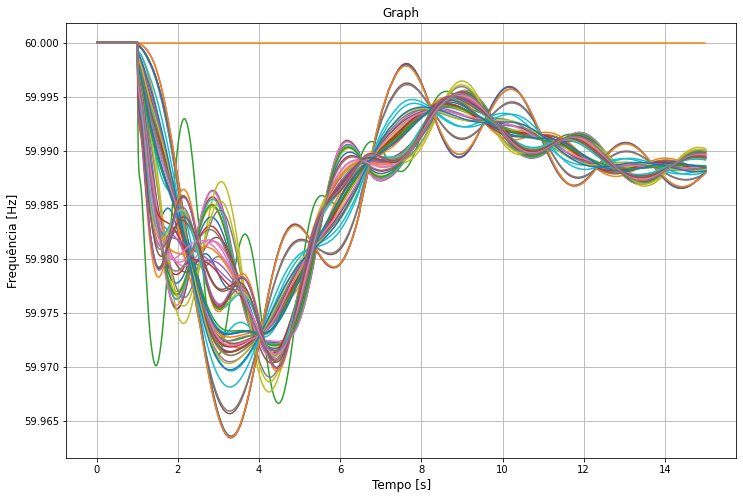

In [48]:
fig = plt.figure(figsize=(12,8))

for i in range(1,69):

    plt.plot(PR.var_dic[labels[0]], PR.var_dic[labels[i]])

plt.title('Graph')  
plt.xlabel("Tempo [s]", fontsize=12)
plt.ylabel("Frequência [Hz]", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True)

plt.show()

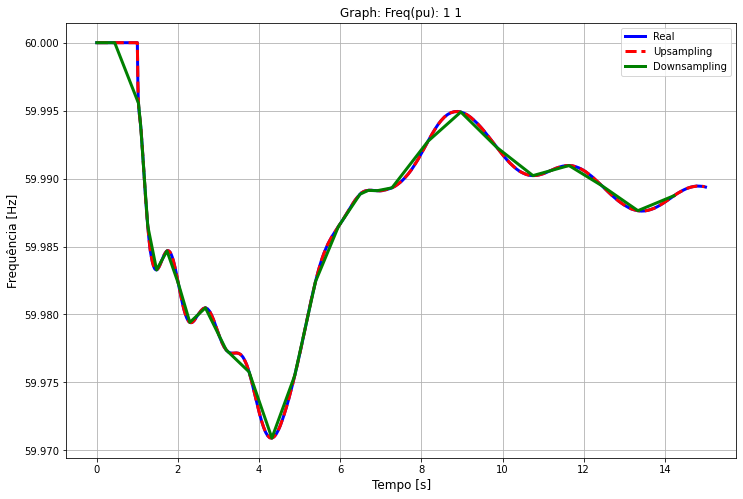

In [ ]:
fig = plt.figure(figsize=(12,8))

plt.plot(PR.var_dic[labels[0]], PR.var_dic[labels[1]], label='Real', linewidth=3, color='b')

plt.plot(resample(x=PR.var_dic[labels[0]], n_sample=500).resampled,
         resample(x=PR.var_dic[labels[1]], n_sample=500).resampled, label='Upsampling', linewidth=3, color='r', linestyle='--')

plt.plot(resample(x=PR.var_dic[labels[0]], n_sample=30).resampled,
         resample(x=PR.var_dic[labels[1]], n_sample=30).resampled, label='Downsampling', linewidth=3, color='g')

plt.title('Graph: ' + labels[1])  
plt.xlabel("Tempo [s]", fontsize=12)
plt.ylabel("Frequência [Hz]", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True)
plt.legend()

plt.show()

In [ ]:
len()

322

In [ ]:
x=PR.var_dic[labels[0]]
n_samples=500

In [ ]:
resample(x=PR.var_dic['Freq(pu): 1 1'], n_sample=20).resampled

array([60.     , 60.     , 59.99555, 59.99231, 59.98652, 59.98398,
       59.98227, 59.97964, 59.97739, 59.97273, 59.97551, 59.9852 ,
       59.98885, 59.98913, 59.98932, 59.99453, 59.99229, 59.99055,
       59.98948, 59.98782])

In [ ]:
resample(x=x, n_sample=n_samples).resampled

In [ ]:
resample(x=PR.var_dic[labels[0]], n_sample=20).resampled
resample(x=PR.var_dic[labels[1]], n_sample=20).resampled

array([60.     , 60.     , 59.99555, 59.99231, 59.98652, 59.98398,
       59.98227, 59.97964, 59.97739, 59.97273, 59.97551, 59.9852 ,
       59.98885, 59.98913, 59.98932, 59.99453, 59.99229, 59.99055,
       59.98948, 59.98782])

In [ ]:
data = np.genfromtxt('C:\\Users\\Scarlet\\Desktop\\bus68\\Eventos\\csv_data\\GL\\' + estavel[20] + ".csv", delimiter=',')   

fig = plt.figure(figsize=(12,8))

for i in range(1,69):

    plt.plot(data[0], data[i])
    plt.title(str(estavel[0]), fontsize=15)
    plt.xlabel("Tempo [s]", fontsize=12)
    plt.ylabel("Frequência [Hz]", fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(True)

fig = plt.figure(figsize=(12,8))
plt.imshow(data[1:])
plt.plot()

In [ ]:
len(PR.variaveis)

69

In [ ]:
VD = VariablesData()

In [ ]:
var, tipo, barra1 = 0, 0, 0

In [ ]:
VD.new_variable(var='Freq(pu)', tipo='BUS', barra1=1, eqp1=0, barra2=0, eqp2=0, multiplier=1)
VD.new_variable(var='Freq(pu)', tipo='BUS', barra1=1, eqp1=0, barra2=0, eqp2=0, multiplier=60)

VD.new_variable(var='Pe(pu)', tipo='SM', barra1=1, eqp1=0, barra2=0, eqp2=0, multiplier=1)

Variable number 1 added
Variable number 2 added
Variable number 3 added


In [ ]:
VD.new_plot(name='Frequency', variable_number=[1])
VD.new_plot(name='Voltage',   variable_number=3)

In [ ]:
VD.append(name='Frequency', variable_number=2)

In [ ]:
VD.save(save_path)

In [ ]:
path = '/content/bus68/'
save_path = '/content/bus68/bus68.wfs'

In [ ]:
WD = WorkData(save_path, path=path)

bus68.dyn
bus68.plv
bus68.evt
.ipynb_checkpoints
bus68.ntw
